<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/008_DataLoaders_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

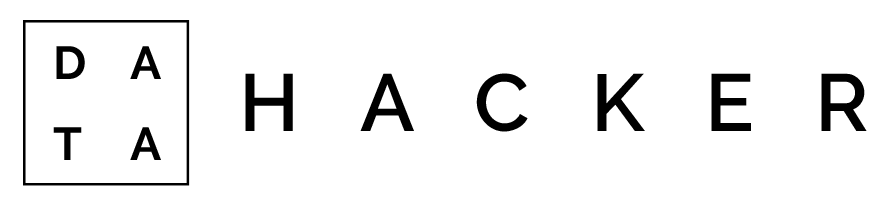
# Data loaders

In [ ]:
from torchvision import datasets, transforms
import torch

import matplotlib.pyplot as plt

For this example we will work on the CIFAR10 dataset. To download this dataset we will simply call `datasets.CIFAR10()`. For the arguments we pass in the `path` where to store the dataset, a boolean value if it is for `training` or `testing` and also if we want to `download` the dataset.

In [ ]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


We will use the `__mro__` attribute to get a list of types the class is derived from.

In [ ]:
type(cifar10_train).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

To check the number of images in this dataset we can simply call `len()` on the dataset. We can see that our training set consists of `50000` images and our testing set contains `10000` images.

In [ ]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_val))

Training:  50000
Testing:  10000


We will select the first image image and it's label from our training set and inspect them. 

In [ ]:
image, label = cifar10[0]

By checking the `type()` of the image we will see that it is a `PIL image`.

In [ ]:
type(image)

PIL.Image.Image

Also, if we print the label we can see that the value is `6`. If we take a look at the class names we will see that it is a frog.

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print(label)
print(classes[label])

6
frog


We can plot the image using matplotlib. And we see that we get an image that is of shape 32x32x3.

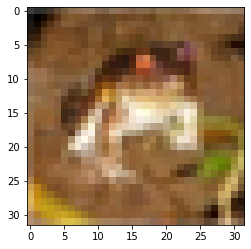

In [ ]:
plt.imshow(image)

## Data Augmentation

To check out all the transformations that we can apply to our dataset we can simply call the `dir()` function on our `transforms` that we imported from `torchvision`.

In [ ]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

To transform our images to tensors we simply call the `transforms.ToTensor()` function. In the brackets we just pass in the image we want to transform.

In [ ]:
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(image)

In [ ]:
type(img_tensor)

torch.Tensor

Now that our image is a tensor, we can check the shape by typing `.shape`. We see that it is an image of shape [3x32x32].

In [ ]:
img_tensor.shape

torch.Size([3, 32, 32])

Another way that we can immeaditelly transform our whole dataset to tensors is by passing in `transforms.ToTensor()` in the parameter `transform`.

In [ ]:
tensor_transformed = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

Now we can simply access any image with indexing. We can check out the label for the first image and also we can see the class by using the `.classes` attribute.

In [ ]:
print(tensor_transformed[0][1])
print(tensor_transformed.classes[6])

6
frog


But, when we try to plot an image, using a regular `plt.imshow()`, we will get an error.

TypeError: ignored

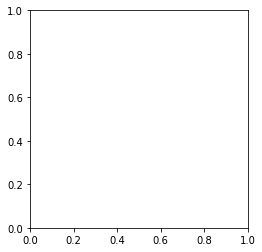

In [ ]:
plt.imshow(tensor_transformed[100][0])

We get this error because our image shape is currently [3x32x32], so we need to reshape it so it is [32x32x3]. The easiest way to achieve this is by using the `.permute()` function. Inside this function we just chnage the indexes of the image. For this example, we will change it from [3x32x32] to [32x32x3] by setting the first index to 1 (shape[1] = 32), second to 2 (shape[2] = 32), and the last to 0 (shape[0] = 3).

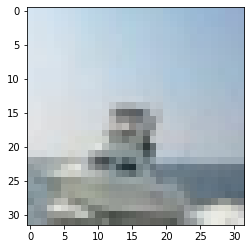

In [ ]:
plt.imshow(tensor_transformed[100][0].permute(1, 2, 0))

Because we are going to work with the whole dataset, we are going to stack all the images. We can achieve this by using the `torch.stack()` function. 

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_transformed], dim=3)

If we print out the shape of the `imgs` we see that it has `50000` images of shape [3x32x32].

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

We can then flatten these images by using the `.view()` function, it is the same as `.reshape()` just for tensors. and if we check out the shape, we get the following reult.

In [ ]:
flattened = imgs.view(3, -1)
print(flattened.shape)

torch.Size([3, 51200000])


Why would all of this be usefull ?\
Well, if we want to find the mean value for all of the images we can simply use the `.mean()` function on the `flattened` images. We can also find the `std` of all the images in a similar manner.

In [ ]:
mean_ = flattened.mean(dim=1)
std_ = flattened.std(dim=1)
print(mean_)
print(std_)

tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


This is usefull when we want to normalize our images. For the normalization we usually use the mean and std of all the images. To normalize the images in this example we will use the `transforms.Normalize()` function. As parameters, we pass first the mean value and then the std.

In [ ]:
transforms.Normalize(mean_.numpy(), std_.numpy())

Normalize(mean=[0.49139965 0.48215845 0.44653094], std=[0.24703224 0.24348514 0.26158786])

To transform the images as we load them in using the `datasets` module, we just pass inside the `transform` parameter the `transforms.Compose()` function. Inside this function we specify what types of transformation we want to apply. For example, we want to transform our images into tensors, we pass in a list `transforms.ToTensor()`. Also, to normalize the images we will pass in the `transforms.Normalize()` function, and as parameters we pass in the `mean_` and `std_` we calculated.

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize(mean_.numpy(), std_.numpy())
]))

Now, we can simply index any image and show it using the `plt.imshow()`. Remember, we need to use the `.permute()` function to change the shape of the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


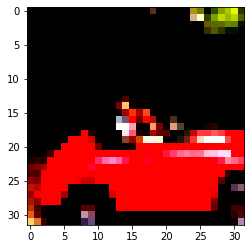

In [ ]:
image, label = transformed_cifar10[99]
plt.imshow(image.permute(1, 2, 0))

Now, we will see how we can load our images inside a `DataLoader` and how we can use it. We will first create a dictionary `label_map` which we will use to change the class label. We will select only two classes out of the 10 classes. For example, the 0th and 2nd class, airplane and bird. 

In [ ]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]

After selecting all the images that belong to those 2 classes, we can now call the `torch.utils.data.DataLoader()`. Inside the brackets we pass in the dataset and we can set some other parameters. For example, we can set the `batch_size` and it will automatically group images into batches, and also we will shuffle our data by passing the boolean value of `True`.

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

To access the images and labels we can simply make a for loop and iterate through the `DataLoader`, `train_loader`, we created.

In [ ]:
for imgs, labels in train_loader:
  print(labels)

We can check out the number of batches it created. For this example, we selected 1024 images, so it created 16 batches of 64 images with labels.

In [ ]:
print(labels.shape)
print(imgs.shape)

torch.Size([16])
torch.Size([16, 3, 32, 32])
